<a href="https://colab.research.google.com/github/Chfirchko/1/blob/master/Raspoznavanie_rukopisnykh_tsifr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Распознавание рукописных цифр MNIST

## Подготовка данных

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=323

In [144]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline
import random

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train_org.shape

(60000, 28, 28)

In [4]:
y_train_org

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

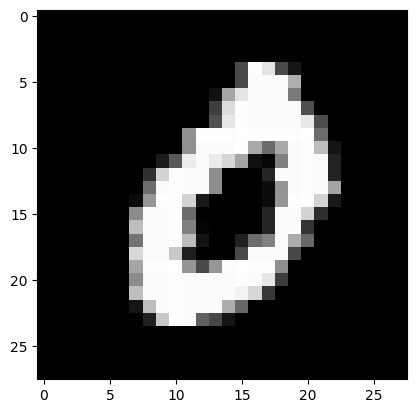

In [5]:
n = 37 #Номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [6]:
y_train_org[n]

np.uint8(0)

In [7]:
y_train_org[n]

np.uint8(0)

In [8]:
type(y_train_org)

numpy.ndarray

In [41]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

ValueError: cannot reshape array of size 47040000 into shape (5000,784)

In [10]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [11]:
y_train_org[0]

np.uint8(5)

In [12]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [13]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [14]:
print(y_train[9]) #Выводим пример одного выходного вектора

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [15]:
y_train_org[9]

np.uint8(4)

In [16]:
print(y_train_org.shape)

(60000,)


In [17]:
print(y_train_org[36])

6


## Создание нейронной сети

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1022

In [90]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(5000, activation="linear")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(5000, activation="linear")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией

model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [91]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 5000)                │       4,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 5000)                │      25,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │          50,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,688,010 (113.25 MB)

 Trainable params: 29,688,010 (113.25 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучение нейронной сети

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1456

In [89]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train[:1000], y_train[:1000], batch_size=60000, epochs=5, verbose=1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0790 - loss: 2.3310
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5250 - loss: 2.0187
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6230 - loss: 3.7075
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6600 - loss: 2.7194
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7740 - loss: 1.0365


In [148]:
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

## Распознавание рукописных цифр

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1870

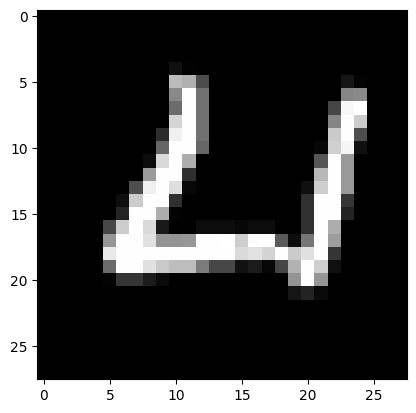

In [146]:
n_rec = random.randint(1, 50) #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [147]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)
prediction = model.predict(x) #Распознаём наш пример
print(prediction) #Выводим результат, это 10 цифр
sum(prediction[0])
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

(784,)
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
[[1.0415065e-06 4.4892709e-12 9.3608413e-11 4.0131129e-15 3.8425997e-06
  2.2900144e-09 9.9999511e-01 1.9333788e-17 2.5442575e-11 7.0138902e-14]]
6


In [124]:
print(prediction) #Выводим результат, это 10 цифр

[[0.11338322 0.09966772 0.114246   0.11110023 0.08239286 0.08771877
  0.11038285 0.08750863 0.09422775 0.09937202]]


In [125]:
sum(prediction[0])

np.float32(1.0)

In [126]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

2


In [119]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

6


# Глоссарий

**Функции активации**

https://keras.io/activations/ - документация

https://ru-keras.com/activation-function/ - русскоязычная документация

*   sigmoid - на выходе значения от 0 до 1
*   relu - на выходе значения от 0 до +∞
*   tanh - на выходе значения от -1 до +1
*   softmax - сумма значения выходов всех нейронов равна 1

**Функции ошибок**

https://keras.io/losses/ - документация

https://ru-keras.com/loss/ - русскоязычная документация


*   mse - среднеквадратичное отклонение
*   mae - среднее абсолютное значение
*   binary_crossentropy - бинарная кроссэнтропия
*   categorical_crossentropy - категориальная кроссэнтропия

**Оптимизаторы**

https://keras.io/optimizers/ - документация

https://ru-keras.com/optimizer/ - русскоязычная документация



*   Adam
*   RMSProp
*   Adadelta

**Градиентный спуск** - процесс поиска минимума функции ошибки

**MNIST** - набор изображений рукописных цифр 28х28 пикселей

**Способы обучения сети:**

*   .train_on_batch - один шаг обучения на фиксированном наборе данных
*   .fit - итерационное обучение сети с возможностью указания количества итераций (epochs) и размера пакета с обучающими данными (batch_size)

**Загрузка изображения**

image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’)





In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

# Слой 1: Dense (1/4)
model.add(Dense(800, input_dim=784, activation='relu'))
# Слой 2: BatchNorm (1/3)
model.add(BatchNormalization())
# Слой 3: Dropout (1/3)
model.add(Dropout(0.3))

# Слой 4: Dense (2/4)
model.add(Dense(5000, activation='linear'))
# Слой 5: BatchNorm (2/3)
model.add(BatchNormalization())
# Слой 6: Dropout (2/3)
model.add(Dropout(0.3))

# Слой 7: Dense (3/4)
model.add(Dense(5000, activation='linear'))
# Слой 8: BatchNorm (3/3)
model.add(BatchNormalization())
# Слой 9: Dropout (3/3)
model.add(Dropout(0.3))

# Слой 10: Dense (4/4) - выходной
model.add(Dense(10, activation='softmax'))

# Проверка количества слоев
print(f"Всего слоев: {len(model.layers)}")  # Выведет 10

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение (с исправленным batch_size)
model.fit(x_train[:1000], y_train[:1000],
          batch_size=32,  # Исправлено: batch_size=60000 слишком большой для 1000 примеров
          epochs=5,
          verbose=1)
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

Всего слоев: 10
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.5868 - loss: 5.2710
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8430 - loss: 2.0784
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9063 - loss: 0.7308
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9445 - loss: 0.3389
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9318 - loss: 0.4575


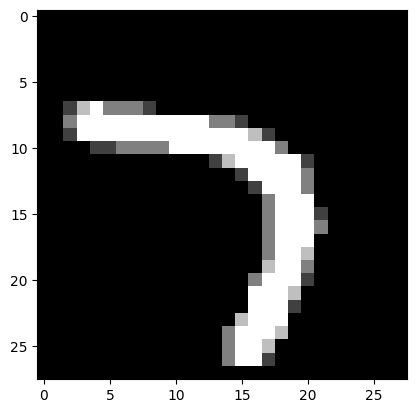

In [161]:
n_rec = random.randint(1, 100) #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [162]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)
prediction = model.predict(x) #Распознаём наш пример
print(prediction) #Выводим результат, это 10 цифр
sum(prediction[0])
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

(784,)
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.3300658e-10 6.7686112e-10 3.8688319e-10 1.3320778e-06 1.0314804e-08
  1.0397762e-09 2.3649863e-11 9.9936026e-01 3.0664886e-09 6.3846394e-04]]
7
